In [1]:
import pandas as pd
import numpy as np
from numpy import loadtxt
from sklearn.metrics import accuracy_score
import seaborn as sns
from pickle import dump

In [2]:
X_train = pd. read_csv("test_train_data/X_train_scaled.csv")
X_train.shape

(425, 30)

In [3]:
X_test = pd. read_csv("test_train_data/X_test_scaled.csv")
X_test.shape

(142, 30)

In [4]:
y_train = pd. read_csv("test_train_data/encoded_y_train.csv")
y_train = y_train.iloc[:, 0]
y_train.shape

(425,)

In [5]:
y_test = pd. read_csv("test_train_data/encoded_y_test.csv")
y_test = y_test.iloc[:, 0]
y_test.shape

(142,)

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report , confusion_matrix

In [7]:
knn_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [8]:
y_predict =knn_model.predict(X_test)
y_predict

array([1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 0.])

In [9]:
cm = confusion_matrix(y_test,y_predict)

<AxesSubplot:>

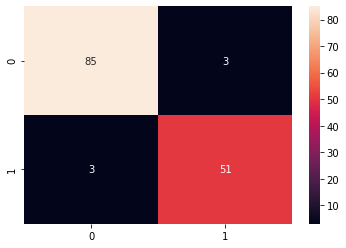

In [10]:
sns.heatmap(cm ,annot=True)

In [11]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, knn_model.predict(X_test)))

Train set Accuracy:  0.9788235294117648
Test set Accuracy:  0.9577464788732394


In [12]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97        88
         1.0       0.94      0.94      0.94        54

    accuracy                           0.96       142
   macro avg       0.96      0.96      0.96       142
weighted avg       0.96      0.96      0.96       142



In [13]:
k = 5

neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

yhat6 = neigh6.predict(X_test)

print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

Train set Accuracy:  0.9788235294117648
Test set Accuracy:  0.9577464788732394


In [14]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.95070423, 0.95774648, 0.95774648, 0.96478873, 0.95774648,
       0.96478873, 0.95774648, 0.96478873, 0.97183099, 0.96478873,
       0.97183099, 0.96478873, 0.96478873, 0.96478873])

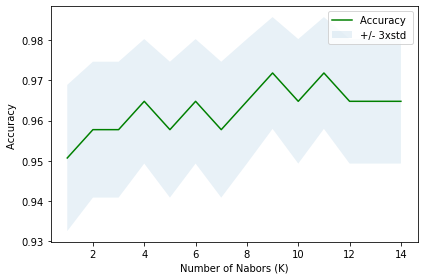

In [15]:
import matplotlib.pyplot as plt
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [16]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.971830985915493 with k= 9


In [17]:
k = 9

neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

yhat6 = neigh6.predict(X_test)

print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))

Train set Accuracy:  0.9764705882352941
Test set Accuracy:  0.971830985915493


In [18]:
dump(neigh6, open('pickles/knn_trained_all.pkl', 'wb'))

## with SK feature dataset

In [19]:
X_train_sk = pd. read_csv("test_train_data/X_train_scaled_sk.csv")
X_train_sk.shape

(425, 7)

In [20]:
X_test_sk = pd.read_csv("test_train_data/X_test_scaled_sk.csv")
X_test_sk.shape

(142, 7)

In [21]:
knn_model_sk = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_model_sk.fit(X_train_sk, y_train)

KNeighborsClassifier()

In [22]:
y_predict_sk =knn_model_sk.predict(X_test_sk)
y_predict_sk

array([1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 0.])

In [23]:
cm_sk = confusion_matrix(y_test,y_predict_sk)

<AxesSubplot:>

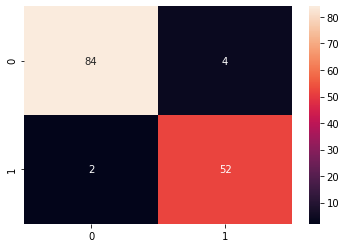

In [24]:
sns.heatmap(cm_sk ,annot=True)

In [25]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn_model_sk.predict(X_train_sk)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, knn_model_sk.predict(X_test_sk)))

Train set Accuracy:  0.9670588235294117
Test set Accuracy:  0.9577464788732394


In [26]:
k = 5

neigh6_sk = KNeighborsClassifier(n_neighbors = k).fit(X_train_sk,y_train)

yhat6_sk = neigh6_sk.predict(X_test_sk)

print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6_sk.predict(X_train_sk)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6_sk))

Train set Accuracy:  0.9670588235294117
Test set Accuracy:  0.9577464788732394


In [27]:
Ks = 15
mean_acc_sk = np.zeros((Ks-1))
std_acc_sk = np.zeros((Ks-1))
ConfustionMx_sk = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh_sk = KNeighborsClassifier(n_neighbors = n).fit(X_train_sk,y_train)
    yhat_sk = neigh_sk.predict(X_test_sk)
    mean_acc_sk[n-1] = metrics.accuracy_score(y_test, yhat_sk)

    
    std_acc_sk[n-1]=np.std(yhat_sk==y_test)/np.sqrt(yhat_sk.shape[0])

mean_acc_sk

array([0.96478873, 0.95774648, 0.96478873, 0.95070423, 0.95774648,
       0.95774648, 0.96478873, 0.96478873, 0.96478873, 0.97183099,
       0.96478873, 0.96478873, 0.96478873, 0.97183099])

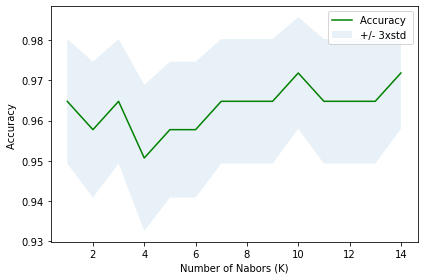

In [28]:
import matplotlib.pyplot as plt
plt.plot(range(1,Ks),mean_acc_sk,'g')
plt.fill_between(range(1,Ks),mean_acc_sk - 1 * std_acc_sk,mean_acc_sk + 1 * std_acc_sk, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [29]:
print( "The best accuracy was with", mean_acc_sk.max(), "with k=", mean_acc_sk.argmax()+1) 

The best accuracy was with 0.971830985915493 with k= 10


In [30]:
k = 10

neigh6_sk = KNeighborsClassifier(n_neighbors = k).fit(X_train_sk,y_train)

yhat6_sk = neigh6_sk.predict(X_test_sk)

print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6_sk.predict(X_train_sk)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6_sk))

Train set Accuracy:  0.9482352941176471
Test set Accuracy:  0.971830985915493


In [31]:
dump(neigh6_sk, open('pickles/knn_trained_sk.pkl', 'wb'))

## with Correlation feature dataset

In [32]:
X_train_cs = pd. read_csv("test_train_data/X_train_scaled_cs.csv")
X_train_cs.shape

(425, 7)

In [33]:
X_test_cs = pd. read_csv("test_train_data/X_test_scaled_cs.csv")
X_test_cs.shape

(142, 7)

In [34]:
knn_model_cs = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_model_cs.fit(X_train_cs, y_train)

KNeighborsClassifier()

In [35]:
y_predict_cs =knn_model_cs.predict(X_test_cs)
y_predict_cs

array([1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 1., 0.])

In [36]:
cm_cs = confusion_matrix(y_test,y_predict_cs)

<AxesSubplot:>

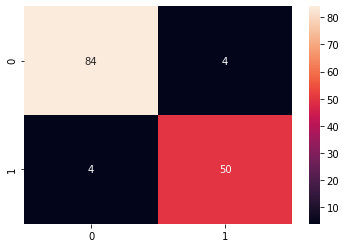

In [37]:
sns.heatmap(cm_cs ,annot=True)

In [38]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn_model_cs.predict(X_train_cs)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, knn_model_cs.predict(X_test_cs)))

Train set Accuracy:  0.971764705882353
Test set Accuracy:  0.9436619718309859


In [39]:
k = 5

neigh6_cs = KNeighborsClassifier(n_neighbors = k).fit(X_train_cs,y_train)

yhat6_cs = neigh6_cs.predict(X_test_cs)

print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6_cs.predict(X_train_cs)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6_cs))

Train set Accuracy:  0.971764705882353
Test set Accuracy:  0.9436619718309859


In [40]:
Ks = 15
mean_acc_cs = np.zeros((Ks-1))
std_acc_cs = np.zeros((Ks-1))
ConfustionMx_cs = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh_cs = KNeighborsClassifier(n_neighbors = n).fit(X_train_cs,y_train)
    yhat_cs = neigh_cs.predict(X_test_cs)
    mean_acc_cs[n-1] = metrics.accuracy_score(y_test, yhat_cs)

    
    std_acc_cs[n-1]=np.std(yhat_cs==y_test)/np.sqrt(yhat_cs.shape[0])

mean_acc_cs

array([0.96478873, 0.95070423, 0.95070423, 0.93661972, 0.94366197,
       0.93661972, 0.94366197, 0.94366197, 0.95070423, 0.94366197,
       0.95070423, 0.94366197, 0.94366197, 0.94366197])

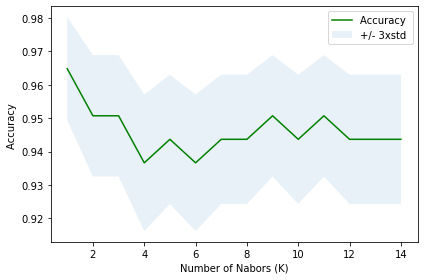

In [41]:
import matplotlib.pyplot as plt
plt.plot(range(1,Ks),mean_acc_cs,'g')
plt.fill_between(range(1,Ks),mean_acc_cs - 1 * std_acc_cs,mean_acc_cs + 1 * std_acc_cs, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [42]:
print( "The best accuracy was with", mean_acc_cs.max(), "with k=", mean_acc_cs.argmax()+1) 

The best accuracy was with 0.9647887323943662 with k= 1


In [43]:
k = 13

neigh6_cs = KNeighborsClassifier(n_neighbors = k).fit(X_train_cs,y_train)

yhat6_cs = neigh6_cs.predict(X_test_cs)

print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6_cs.predict(X_train_cs)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6_cs))

Train set Accuracy:  0.9670588235294117
Test set Accuracy:  0.9436619718309859


In [44]:
dump(neigh6_cs, open('pickles/knn_trained_cs.pkl', 'wb'))